## Pattern Recognition and Machine Learning - Assignment
### CCE2502 - Year 2022-2023- Semester II, v.0.1.0
####  developed by - Adrian Muscat, 2023
---
### Write your name, ID Card Number and class below

Jasmine Micallef,
395301L,
CCE2502
---


In this assignment you will be developing Python code to experiment with the k-Nearest Neighbour (k-NN) predictive model.


All questions are graded and total to 100.
This assignment contributes to a maximum of 30% of the final study unit score. 


## NOTE: 

This work is to be attempted individually. It is essential that the work you eventually submit and present for your assignment consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.

Please sign and attached the plagiarism form at:

https://www.um.edu.mt/ict/students/formsguidelines/


In [1]:
# We first load some modules
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv
%matplotlib inline

# In addition you will need the following libraries
# scipy
# sklearn
# time

## Helper functions and dataset

Below are some helper functions and code to load and split datasets (do not change these functions)

In [2]:
# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [3]:
# Our classroom k-NN model (not the most efficient one)
def k_nearest_neighbour_euclidian(k, X_train, y_train, x_new):
    """
    k : hyper-parameter in k-NN model
    X_train : feature array in n-dimensions
    y_train : output labels in any dimension, typically 1-dimension
    x_new : query example in n-dimensions
    Returns the predicted class 
    """
    m = y_train.shape[0]
    dist = ((X_train-x_new)**2).sum(axis=1)
    DD = np.concatenate((X_train, y_train.reshape((m,1)), 
                         dist.reshape((m,1))), axis=1)
    DDs = DD[np.argsort(DD[:,3])]
    r = DDs[0:k,2].sum()
    if r > k/2.:
        c = 1
    else: c=0
    return c 

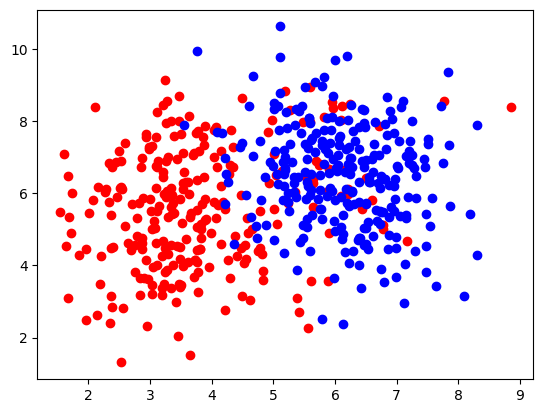

In [4]:
# The pickle file contains two dataset, a large one and a small one 
# sampled from the same distribution
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
# let's plot the larger one
D = np.copy(datasets[0])
data_scatter_plot(D[:,1:3], D[:,3])

In [5]:
# Shuffle and split into train and test
# Do not change this code
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D = np.copy(datasets[0])
#
m = D.shape[0]
S = int(m*0.7)
np.random.seed(0)
np.random.shuffle(D)
X_train, y_train = D[0:S,1:3], D[0:S,3]
X_test, y_test = D[S:,1:3], D[S:,3]
print("Training set size", X_train.shape, y_train.shape)
print("Testing set size ", X_test.shape, y_test.shape)

Training set size (367, 2) (367,)
Testing set size  (158, 2) (158,)


## QUESTION 1 [10 marks]
### Compute the accuracy on the test set for k=1
Use above given k_nearest_neighbour_euclidian() function

In [6]:
def compare_knn(k, X_train, y_train, X_test, y_test):
    
    n = X_test.shape[0]
    
    #k_nearest_neighbour_euclidian() 
    y = np.zeros(n)
    for i in range(n):
        y[i] = k_nearest_neighbour_euclidian(k, X_train, y_train, X_test[i])

    #test accuracy
    test_acc = np.zeros(n)
    for i in range(n):
        if y[i] == y_test[i]: 
            test_acc[i] = 1
        else:
            test_acc[i] = 0

    return sum(test_acc)/n

print('Accuracy on the test set for k=1:', compare_knn(1, X_train, y_train, X_test, y_test))


Accuracy on the test set for k=1: 0.810126582278481


## QUESTION 2 [10 marks]
### Find k (in the range of [1, 21]) that maximises the accuracy

In [7]:
knn_acc = np.zeros(20)

#compute accuracy for each k
for i in range(1,21):
    knn_acc[i-1] = compare_knn(i, X_train, y_train, X_test, y_test)
        
#largest accuracy computed
max_acc = max(knn_acc)

#find corresponding element
for k in range(1,21):
    knn_acc[k-1] = compare_knn(k, X_train, y_train, X_test, y_test)
    if knn_acc[k-1] == max_acc:
        break

print('Maximum accuracy:', max_acc)
print('Achieved at k =', k)


Maximum accuracy: 0.8670886075949367
Achieved at k = 17


## Timing the code using time.time( ) function
We would like to time the code to carry out empirical time complexity analysis. Below are some examples.

In [8]:
# We want to record the time taken when predicting 
#output using the kNN model

import time

def knn_vector(X_train, y_train, X_test, y_test, k):
    """
    This function takes multiple new instances
    x_new is a [N,2] matrix of new inputs
    """
    N = X_test.shape[0]
    pred = np.empty(N)
    for i in range(N):
        pred[i] = k_nearest_neighbour_euclidian(k, X_train, 
                                            y_train, X_test[i])
    return (pred==y_test).mean()

start_time = time.time()
acc = knn_vector(X_train, y_train, X_test, y_test, 17)
end_time = time.time()
print("Accuracy =", acc)
print("Time taken =", end_time-start_time)

Accuracy = 0.8670886075949367
Time taken = 0.00625300407409668


In [9]:
# Because of house keeping processes, 
# perhaps it's better to run it multiple times,
# and take the median or mean 

duration = np.empty(100)
for i in range(100):
    start_time = time.time()
    acc = knn_vector(X_train, y_train, X_test, y_test, 17)
    end_time = time.time()
    duration[i] = end_time-start_time
    
print("The median duraton =", np.median(duration))
print("The mean duration   =", np.mean(duration))

The median duraton = 0.004785418510437012
The mean duration   = 0.004796628952026367


## QUESTION 3 [10 marks]
### Would you prefer to use the mean() or the median() in the above timing routine? Give reasons for your answer.


In [10]:
from scipy.stats import skew
skew(duration)

1.4662820817976248

Given that the distribution of the data obtained has a relatively high skewness, statistically, it is better to take the median. This is because high skewness could be an indication of outliers or asymmetric distributions which would affect the mean but not the median. 

## kd-tree algorithm for efficient search
We can organise the data in a kd-tree for a more efficient search. In this exercise you will use a small dataset (21 examples) to demonstrate how the feature space is organised. For more information on the kd-tree algorithm see class notes and text book. We first load the dataset:

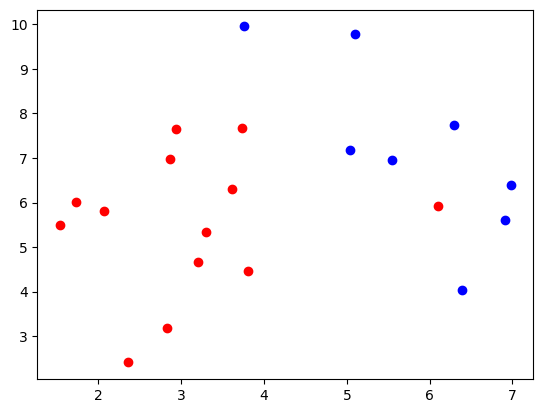

In [11]:
# Load the samll dataset
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D_s = np.copy(datasets[1])
data_scatter_plot(D_s[:,1:3], D_s[:,3])

## QUESTION 4 [30 marks]
### Develop python code to carry out the following steps:
1. Split the dataset on the first feature (column 1) into two balanced sets (left_set_0 and right_set_0). Write down the IDs of the examples in the left_set and right_set and the ID of the root node.
2. Plot the hyperplane on the scatter plot.
3. Next, split the left_set_0 on the second feature (column 2) into two further sets (left_set_1 and right_set_1). Write down the IDs of the examples in the left_set and right_set and the ID of the root node.
2. Plot the hyperplane on the scatter plot.

In [12]:
#4.1 - splitting dataset on first feature

#finding root node ID
D_s = D_s[D_s[:,1].argsort()] #sort left_set_0 by col 1
rootID = int(D_s[10,0]) #root node is 10th element

#root node
root = D_s[10,1]

ds = np.delete(D_s, 10, axis=0) #remove root node from data

#splitting sets by threshhold
left_set_0 = ds[:10,:]
right_set_0 = ds[10:,:]

right_set = right_set_0[:,0]
left_set = left_set_0[:,0]

print('left_set:', left_set)
print('right_set:',right_set) 
print('root node ID:',rootID) 

left_set: [ 4.  8. 18. 12. 16.  7.  6. 17.  5. 20.]
right_set: [13.  0. 11. 10. 15.  2. 19.  1.  9.  3.]
root node ID: 14


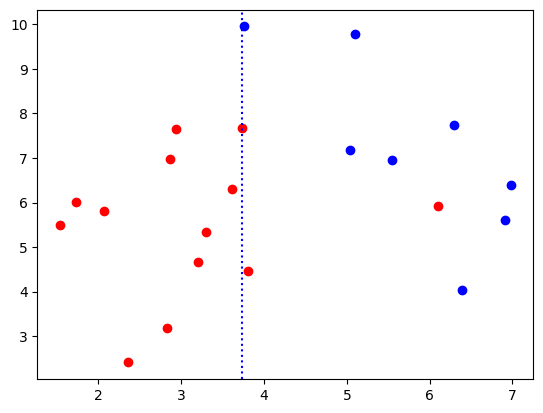

In [13]:
#4.2 - plotting hyperplane

data_scatter_plot(D_s[:,1:3], D_s[:,3])
plt.axvline(x = root, color = 'b', linestyle = 'dotted')

In [14]:
#4.3 - splitting dataset on second feature

#finding root node ID
left_set_0 = left_set_0[left_set_0[:,2].argsort()] #sort left_set_0 by col 2
rootID = int(left_set_0[5,0]) #root node is 5th element

#root node
root1 = left_set_0[5,2]

ls = np.delete(left_set_0, 5, axis=0) #remove root node from data

#splitting sets by threshhold
left_set_1 = ls[:4,:]
right_set_1 = ls[4:,:]

right_set = right_set_1[:,0]
left_set = left_set_1[:,0]

print('left_set:', left_set)
print('right_set:',right_set) 
print('root node ID:',rootID) 

left_set: [12. 16. 17.  5.]
right_set: [ 4.  8. 20.  7.  6.]
root node ID: 18


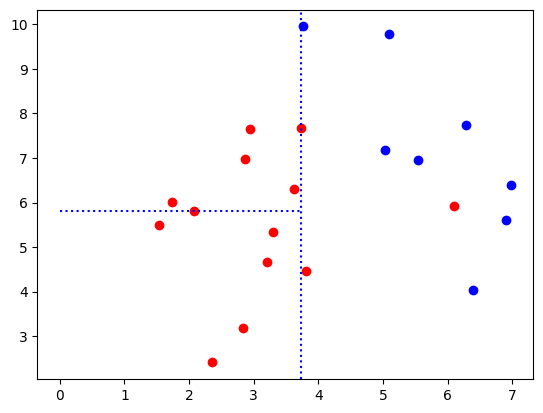

In [15]:
#4.4 - plotting second hyperplane

data_scatter_plot(D_s[:,1:3], D_s[:,3])
plt.axvline(x = root, color = 'b', linestyle = 'dotted')
plt.hlines(y = root1, xmin = min(D_s[2]), xmax = root, color = 'b', linestyle = 'dotted')

## cKDTree algorithm from scipy library
As you might have suspected, building the tree requires significant effort. For the next exercise we will use a ready made implementation from the scipy library. More specifically we will make use of the cKDTree algorithm to implement a kNN model. Below is an example code of how to use the function.

In [16]:
from scipy.spatial import cKDTree

#First re-load and split the large dataset, to make sure it's intact.
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D = np.copy(datasets[0])
#
m = D.shape[0]  #Number of instances in dataset
S = int(m*0.7)
np.random.seed(0)
np.random.shuffle(D)
X_train, y_train = D[0:S,1:3], D[0:S,3]
X_test, y_test = D[S:,1:3], D[S:,3]

#We then proceed to build the tree from the training data
tree = cKDTree(X_train, leafsize=1)

#We then use the tree to seach for k nearest neighbours
k=17
N = y_test.shape[0]
pred = np.empty(N)
for j in range(N):
    _, ind = tree.query(X_test[j].reshape(1, -1), k)  
    first_k = y_train[ind]
    r = first_k.sum()
    if r > k/2.:
        pred[j] = 1
    else: pred[j]=0
print("Accuracy =",(pred==y_test).mean())

Accuracy = 0.8670886075949367


## Question 5 [10 marks]

### Copy the above kdTree code and add timing code  to study whether it results in faster execution than searching across the whole dataset, as in the standard kNN.

note: We are mainly interested in the time taken during inference, since the tree is constructed once (training part). However we use it multiple times to predict the output from new input features.  
### What do you conclude from the timing exercise?

In [17]:
#kNN
duration = np.empty(100)
for i in range(100):
    start_time = time.time()
    acc = knn_vector(X_train, y_train, X_test, y_test, 17)
    end_time = time.time()
    duration[i] = end_time-start_time
    
print("The median duraton for kNN =", np.median(duration))
print("The mean duration for kNN =", np.mean(duration))

#kdTree
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D = np.copy(datasets[0])
#
m = D.shape[0]  #Number of instances in dataset
S = int(m*0.7)
np.random.seed(0)
np.random.shuffle(D)
X_train, y_train = D[0:S,1:3], D[0:S,3]
X_test, y_test = D[S:,1:3], D[S:,3]

#We then proceed to build the tree from the training data
tree = cKDTree(X_train, leafsize=1)

#time kdTree
duration = np.empty(100)
for i in range(100):
    start_time = time.time()
    k=17
    N = y_test.shape[0]
    pred = np.empty(N)
    for j in range(N):
        _, ind = tree.query(X_test[j].reshape(1, -1), k)  
        first_k = y_train[ind]
        r = first_k.sum()
        if r > k/2.:
            pred[j] = 1
        else: pred[j]=0
    end_time = time.time()
    duration[i] = end_time-start_time
    
print("The median duraton for kdTree =", np.median(duration))
print("The mean duration for kdTree =", np.mean(duration))

The median duraton for kNN = 0.004715919494628906
The mean duration for kNN = 0.004784107208251953
The median duraton for kdTree = 0.001927018165588379
The mean duration for kdTree = 0.0019647717475891114


As shown in the results above, both the median and mean duration of the kdTree inference execution are less than the respective durations computed for the kNN model. 

## Time complexity Analysis
In this last question you will empirically carry out a time complexity analysis of both the standard exhaustive search kNN algorithm, (our k_nearest_neighbour_euclidian()) and the kdTree search kNN algorithm, (scipy's cKDTree model). 

For this study you will use a synthetically generated dataset, that allows you to vary its size. See below function (based on sklearn library) that generates the two moons binary classification dataset. The function allows you to define the size of the set and noise in the samples. 

In [18]:
from sklearn.datasets import make_moons
def generate_dataset(size=1000, noise_mag = 0.2):
    """
    size : number of samples (instances) in dataset
    noise_mag : magnitude of noise in samples
    """
    datasets = [
        make_moons(n_samples = size, shuffle = True,
                   noise = noise_mag, random_state = 0)]
    return datasets[0][0], datasets[0][1]

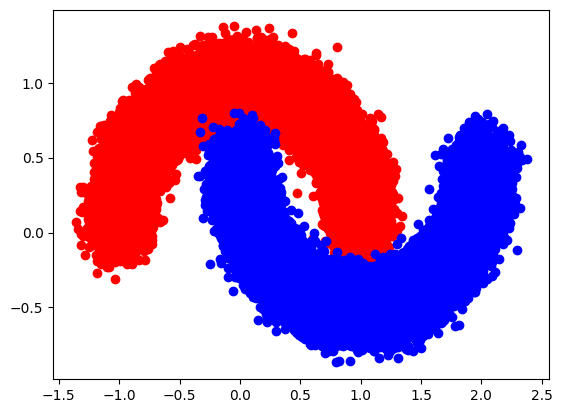

In [19]:
# Example of dataset 
# Feel free to experiment with size and noise figures
X, y = generate_dataset(100000,0.1)
data_scatter_plot(X, y)

## QUESTION 6 [30 marks]

Develop a computational  experiment to compare the time complexity of the two algoithms. In other words you have to record the computational time to predict a fixed number of test samples for various dataset sizes, for example, size = 1000, 10000, 100000 and 1000000.

In this experiment fix k=11, noise=0.2, and test_set_size=200.

Although not required, you can use the accuracy metric as a sanity check (i.e models with various dataset sizes are returning similar accuracy results).

Ignore time taken to build the tree.

### What do you conclude from the experiment?

### Explain the limitations of your experimental setup.

In [ ]:
#testing kNN time complexity
kdtDuration = np.zeros(3)

m=1000; d=0
while(m <= 100000):

    #generate dataset
    X, y = generate_dataset(m,0.2)
    print("size =",m,":")

    X_train, y_train = X[0:m-200,:], y[0:m-200]
    X_test, y_test = X[m-200:,:], y[m-200:]

    #time kNN
    duration = np.empty(100)
    for i in range(100):
        start_time = time.time()
        acc = knn_vector(X_train, y_train, X_test, y_test, 11)
        end_time = time.time()
        duration[i] = end_time-start_time

    print("Accuracy =",acc)
    if abs(skew(duration)<=1):  #if data is not too skewed
        print("Mean duration =",np.mean(duration))  #take mean
        kdtDuration[d] = np.mean(duration)
    else:
        print("Mdian duration =",np.median(duration)) #else take median
        kdtDuration[d] = np.median(duration)
    print(" ")

    d+=1;
    m*=10 #increase dataset size

#plot durations
x = np.linspace(1000, 100000, 3)
plt.stem(x, kdtDuration)
plt.xlabel('dataset size')
plt.ylabel('median duration')
plt.show()

size = 1000 :
Accuracy = 0.965
Mdian duration = 0.011616110801696777
 
size = 10000 :
Accuracy = 0.975
Mdian duration = 0.1531829833984375
 
size = 100000 :


size = 1000 :
Accuracy = 0.965
Median duration = 0.0024529695510864258
 
size = 10000 :
Accuracy = 0.975
Mean duration = 0.0025155115127563476
 
size = 100000 :
Accuracy = 0.97
Median duration = 0.0023834705352783203
 
size = 1000000 :
Accuracy = 0.98
Median duration = 0.0025169849395751953
 
size = 10000000 :
Accuracy = 0.99
Median duration = 0.0025076866149902344
 


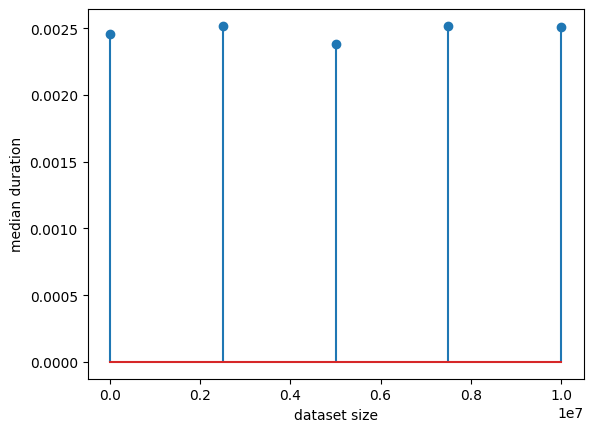

In [27]:
#testing kdTree time complexity
kdtDuration = np.zeros(5)

m=1000; d=0
while(m <= 10000000):

    #generate dataset
    X, y = generate_dataset(m,0.2)
    print("size =",m,":")

    X_train, y_train = X[0:m-200,:], y[0:m-200]
    X_test, y_test = X[m-200:,:], y[m-200:]

    #kdTree
    tree = cKDTree(X_train, leafsize=1)

    #time kdTree
    duration = np.empty(100)
    for i in range(100):
        start_time = time.time()
        k=11
        N = y_test.shape[0]
        pred = np.empty(N)
        for j in range(N):
            _, ind = tree.query(X_test[j].reshape(1, -1), k)  
            first_k = y_train[ind]
            r = first_k.sum()
            if r > k/2.:
                pred[j] = 1
            else: pred[j]=0
        end_time = time.time()
        duration[i] = end_time-start_time
        
    print("Accuracy =",(pred==y_test).mean())
    if abs(skew(duration)<=1):  #if data is not too skewed
        print("Mean duration =",np.mean(duration)) #take mean
        kdtDuration[d] = np.mean(duration)
    else:
        print("Median duration =",np.median(duration))  #else take median
        kdtDuration[d] = np.median(duration)
    print(" ")
    
    d+=1
    m*=10 #increase dataset size
    
#plot durations
x = np.linspace(1000, 10000000, 5)
plt.stem(x, kdtDuration)
plt.xlabel('dataset size')
plt.ylabel('median duration')
plt.show()

As the duration data obtained was found to be skewed, the median was taken. From the results, it is made clear that that as the size of the dataset increases, the time taken to execute the kNN algorithm increases drastically compared to the kdTree algorithm. 

For the smallest dataset sizes that were tested, the kNN algorithm  Every time the size of the data set is multiplied by 10, the time taken to predict 200 samples using the kNN algorithm also approximately multiplies by 10. On the other hand, the kdTree algorithm shows virtually no change in execution time. 

At m=1000000, the kNN algorithm was taking far too long to compute the time complexity. However, the kdTree was executed at almost the same duration of that taken for m=1000. In fact, as shown in the stem graphs plotted for the both algorithms, kdTree stays quite consistant as apposed to kNN.

This indicates that the kdTree algorithm is far less computationally complex and can make predictions for much larger datasets. The kNN algorithm is extremely impractical for big data. 

In this experiment, the times of each algorithm were calculated seperately due to the amount of time kNN was taking to execute at m=1000000. By creating seperate loops, more data could be collected on the kdTree durations. For this reason, a big limitation of this experiment was that not much data on the the kNN algorithm could be gathered to accurately analyze its time complexity.